# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv("hotel_booking.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Exploratory Data Analysis and Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 36)

In [6]:
df = df.drop(["name", "email", "phone-number", "credit_card"], axis= 1)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [10]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("."*50)

hotel
['Resort Hotel' 'City Hotel']
..................................................
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
..................................................
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
..................................................
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(["agent", "company"], axis = 1, inplace =True)
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
df = df[df["adr"]<5000]

# Data Visualizations and Analysis

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


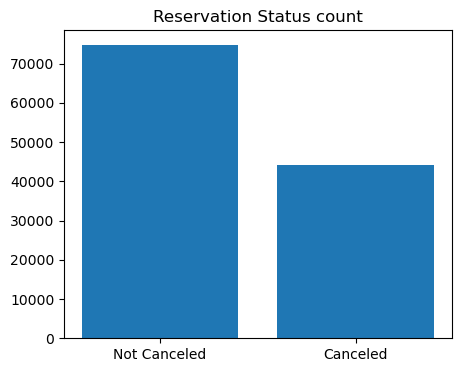

In [17]:
calcenla_perc = df["is_canceled"].value_counts(normalize = True)
print(calcenla_perc)

plt.figure(figsize = (5,4))
plt.title("Reservation Status count")
plt.bar(["Not Canceled", "Canceled"],df["is_canceled"].value_counts())
plt.show()

# Canceled are more than half, so this is major issues is for hotels

# The above bar graph shows the percentage of reservations that are canceled are those that are not. Its obvious that there are still significant number of reservations that have not canceled. There are still 37% of clients who canceled their reservation, which has significant impact in the hotels earnings

Text(0, 0.5, 'number of reservations')

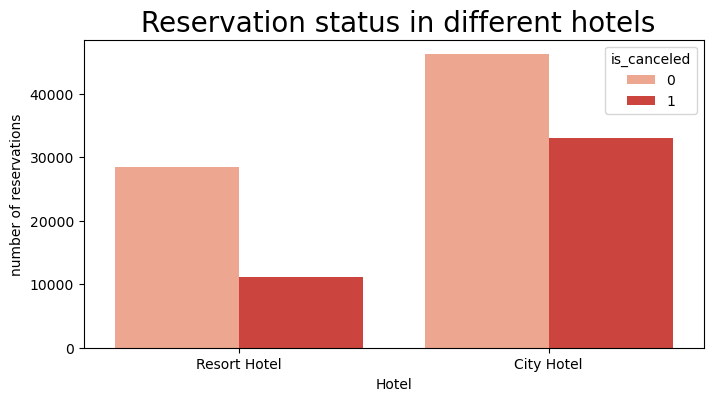

In [18]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = "hotel" , hue = "is_canceled", data =df, palette = "Reds")
plt.title(" Reservation status in different hotels", size = 20)
plt.xlabel("Hotel")
plt.ylabel("number of reservations")

#  On comparing, city hotel have more bookings, Its possible that resort hotel are more expensive than city hotel

In [19]:
resort_hotels = df[df["hotel"] == "Resort Hotel"]
resort_hotels["is_canceled"].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [20]:
city_hotels = df[df["hotel"] == "City Hotel"]
city_hotels["is_canceled"].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [21]:
resort_hotels = resort_hotels.groupby("reservation_status_date")[["adr"]].mean()
city_hotels = city_hotels.groupby("reservation_status_date")[["adr"]].mean()

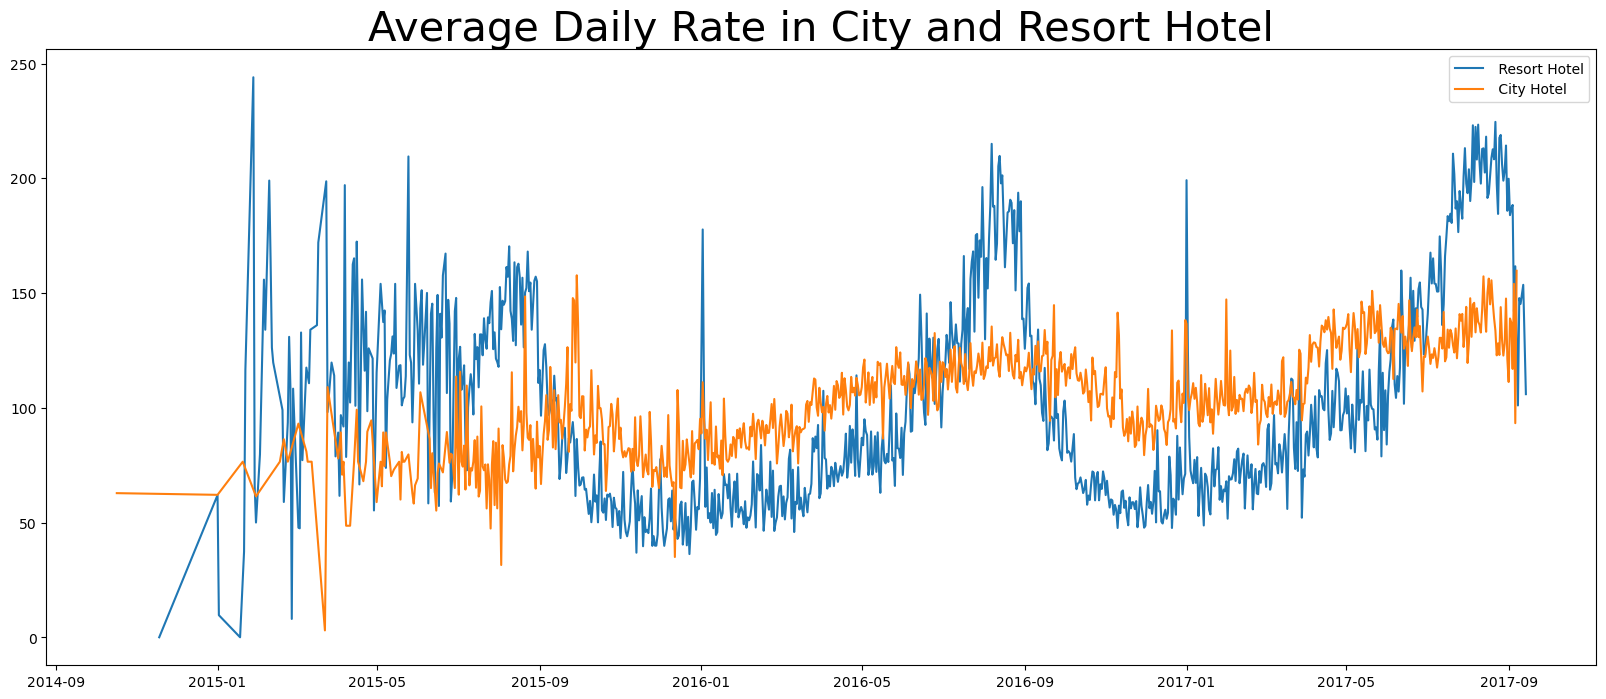

In [22]:
plt.figure(figsize = (20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize = 30)
plt.plot(resort_hotels.index, resort_hotels["adr"], label = ' Resort Hotel')
plt.plot(city_hotels.index, city_hotels["adr"], label = ' City Hotel')
plt.legend(fontsize = 10)

# Line graph shows that. on certain days, the average daily rate of resort hotel is more than the city hotel, weekends and holidays are seen more rise in resort hotel rates

Text(0.5, 0, 'Months')

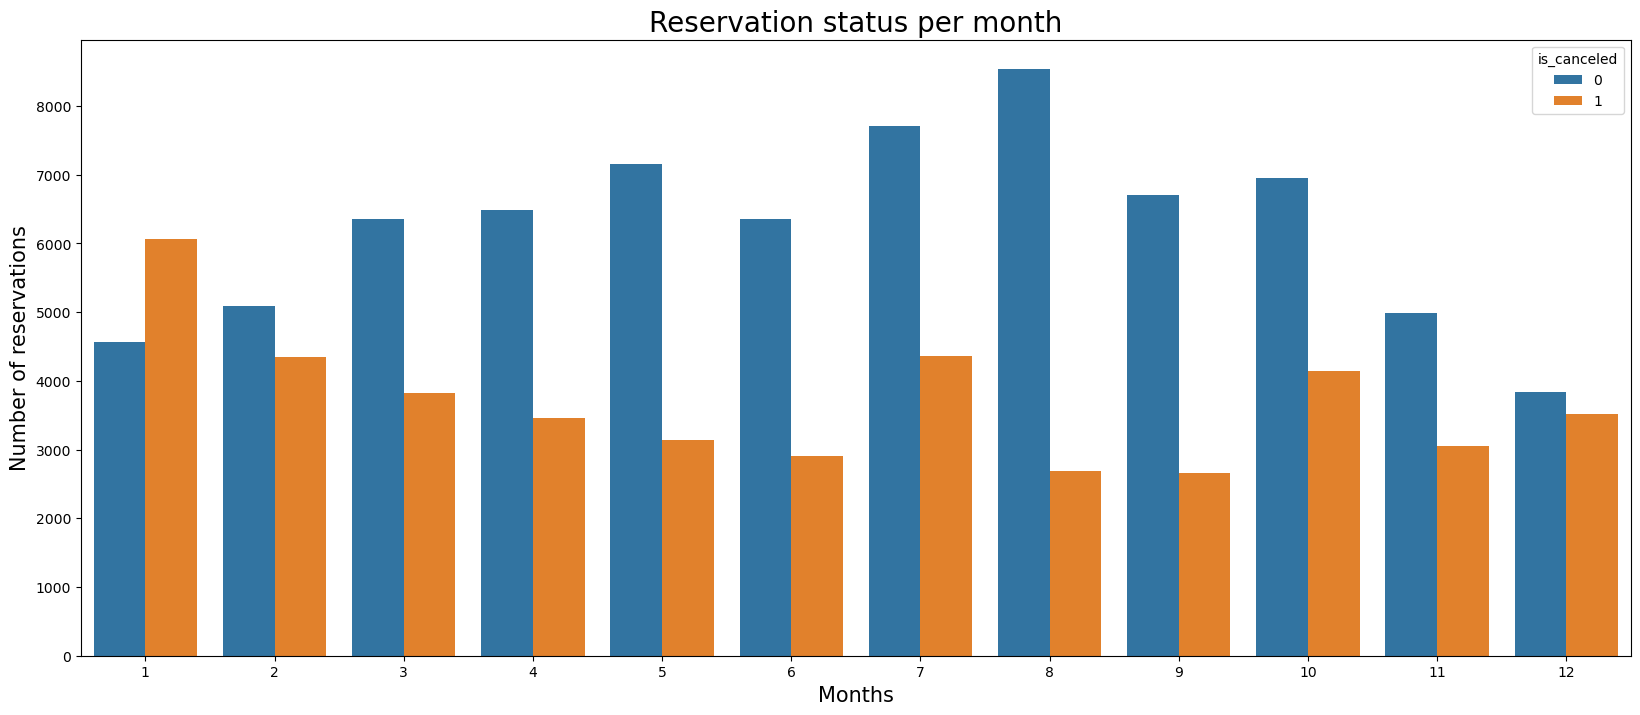

In [23]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize = (20,8))
ax1 = sns.countplot(x = "month", hue = "is_canceled", data = df)
plt.title("Reservation status per month", size = 20)
plt.ylabel("Number of reservations" , size = 15)
plt.xlabel("Months" , size = 15)

# Above barplot shows between months and number of reservations i.e highest and lowest reservation levels according to reservations status. As seen in above plot both number of confirmed reservation and number of cancelled reservation  are seen in August respectively, Whereas in January most canceled reservation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


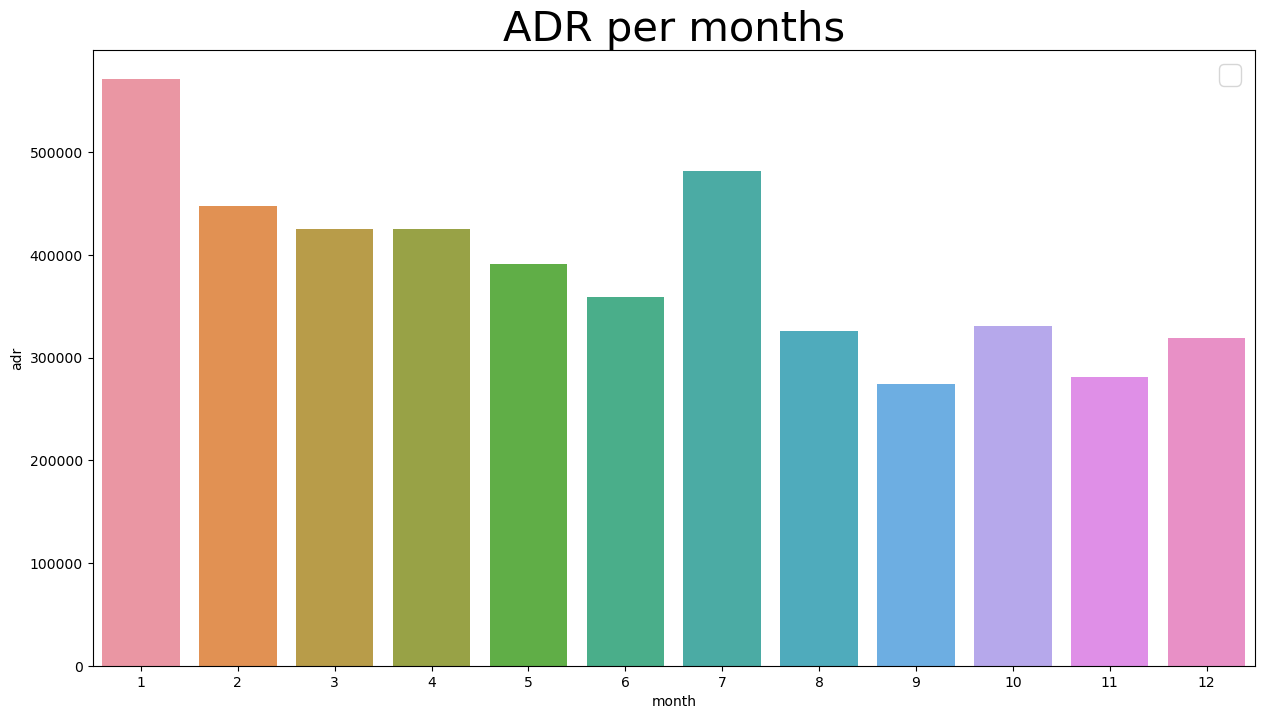

In [24]:
plt.figure(figsize = (15,8))
plt.title("ADR per months", fontsize = 30)
sns.barplot("month", "adr", data = df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())
plt.legend(fontsize = 20)
plt.show()

# This bar graph tells that cancellations are most common when prices are greatest and are the least common when they are lowest, Therefore, the cost of accomodation is solely responsible for the cancellation

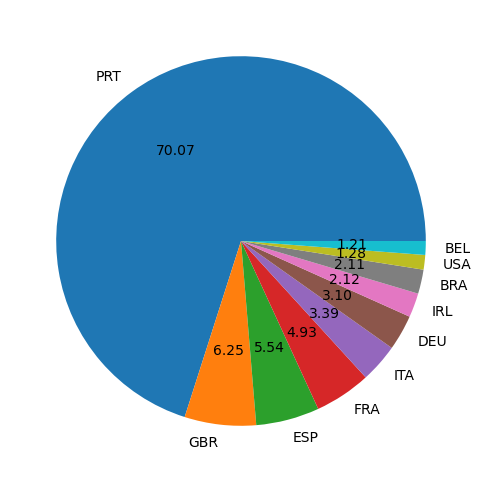

In [30]:
canceled_data = df[df["is_canceled"] == 1]
top_10_country = canceled_data["country"].value_counts()[:10]
plt.figure(figsize = (6,6))
plt.pie(top_10_country, autopct = "%.2f", labels = top_10_country.index)
plt.show()

#  Portugal Country is the highest number of cancellation, serious action to be taken place.

In [31]:
df["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [27]:
df["market_segment"].value_counts( normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [28]:
canceled_data["market_segment"].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

# 46% are comes from online travel agencies, 27% of comes from the groups, 4% are comes from visiting the hotel directly.
   

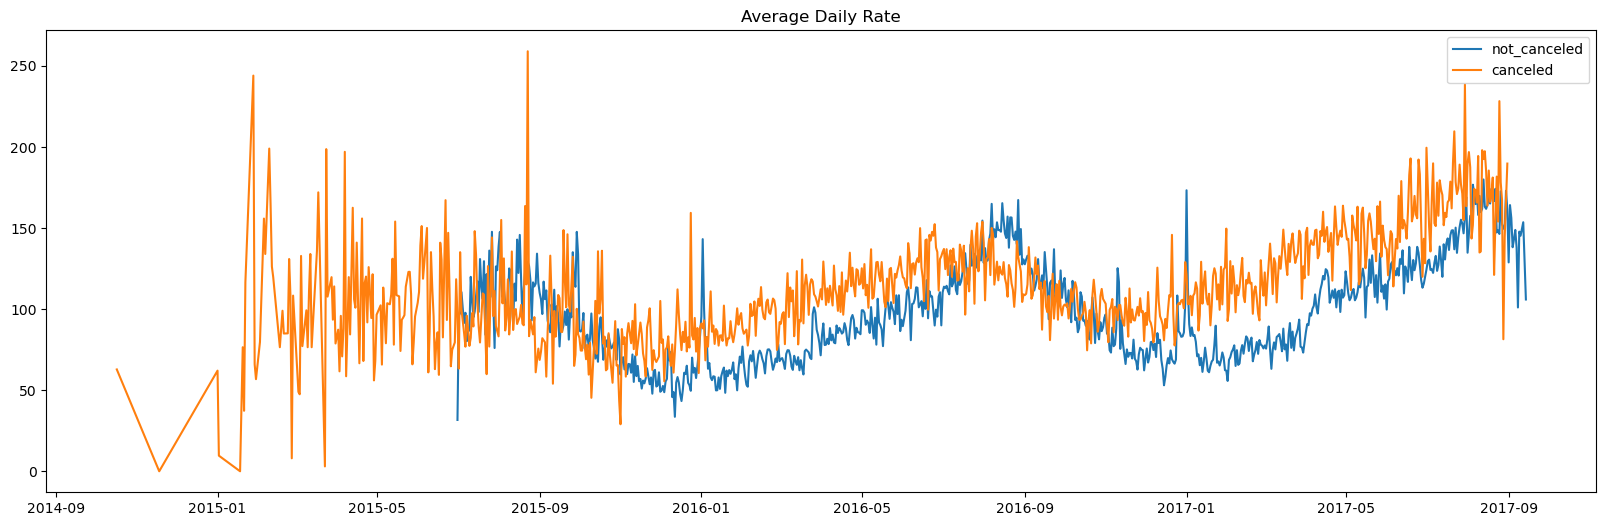

In [29]:
canceled_data =  df[df["is_canceled"] == 1]
canceled_data_adr = canceled_data.groupby('reservation_status_date')[["adr"]].mean()
canceled_data_adr.reset_index(inplace = True)
canceled_data_adr.sort_values("reservation_status_date", inplace = True)

not_canceled_data =  df[df["is_canceled"] == 0]
not_canceled_data_adr = not_canceled_data.groupby('reservation_status_date')[["adr"]].mean()
not_canceled_data_adr.reset_index(inplace = True)
not_canceled_data_adr.sort_values("reservation_status_date", inplace = True)

plt.figure(figsize = (20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_data_adr["reservation_status_date"], not_canceled_data_adr["adr"], label = "not_canceled")
plt.plot(canceled_data_adr["reservation_status_date"], canceled_data_adr["adr"], label = "canceled")
plt.legend()

# As seen in the graph that average daily rate is higher than when it is not canceled, therefore it tells that higher prices leads to higher cancellation

# Suggesgtions for hotels 

# 1. Cancellation rates rise as the prices are more, in order to reduce this work on pricing stratigies and try to lower the rates for specific hotels based on locations

# 2. Have to increase the quality of the hotels and services in the Portugal

# 3. In month of January, hotels can start campaign and provide best service

# 4. Provide some reasonable amount of discounts in weekends and holidays, because cancellation and not cancellation ratio is more